<div style="background-color: olive; padding: 40px; font-size: 40px; color: white; text-align: center; border-radius: 10px; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);">
    <strong>How to Sip Success:</strong><br><br><br><span style="font-size: 30px;"><em>Secrets of Premium Wine</em></span>
</div>


## Project Overview / Goal:    


This project emphasizes the value of data-driven decision-making in the wine industry and highlights the potential of unsupervised learning techniques, such as clustering, to enhance wine quality prediction.

In [128]:
# Import Pandas for data manipulation
import pandas as pd

# Import numpy for numerical operations
import numpy as np

# Import Matplotlib for data visualization
import matplotlib.pyplot as plt

# Import Seaborn for enhanced plotting
import seaborn as sns

# Import custom module named 'wrangle' as 'w'
import wrangle as w

# Import r2_score for evaluating regression models
from sklearn.metrics import r2_score

# Import mean_squared_error for evaluating regression models
from sklearn.metrics import mean_squared_error

# Import RFE (Recursive Feature Elimination) and SelectKBest for feature selection
from sklearn.feature_selection import RFE, SelectKBest

# Import PolynomialFeatures for creating polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Import KMeans for clustering
from sklearn.cluster import KMeans

# Import LogisticRegression for classification tasks
from sklearn.linear_model import LogisticRegression

# Import KNeighborsClassifier for k-nearest neighbors classification
from sklearn.neighbors import KNeighborsClassifier

# Import classification_report for generating classification performance reports
from sklearn.metrics import classification_report

# Import confusion_matrix for computing confusion matrices in classification
from sklearn.metrics import confusion_matrix

# Import DecisionTreeClassifier for decision tree-based classification
from sklearn.tree import\
DecisionTreeClassifier as DT

# Import statistical functions from SciPy
from scipy import stats

# Import warnings to suppress non-essential messages
import warnings
warnings.filterwarnings("ignore")


<div style="background-color: olive; padding: 20px; font-size: 20px;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - <strong style="font-size: 18px; background-color: orange;">PLAN</strong> --- Acquire --- Prepare --- Explore --- Model --- Deliver
    </div>
</div>



Initial Questions
 - What is the main objective of this machine learning project?
 - From where to obtain the data for this project?
 - What format is the data in, and what preprocessing steps are needed?
 - Are there any missing values or outliers that require attention?
 - Which features (variables) will be used as predictors in the models?
 - How can clustering be used to improve the model?
 - What types of machine learning models are suitable for the problem? (Linear, Nonlinear, etc.)
 - Linear Algorithm:Logistic Regression
 - Nonlinear Algorithms:K-Nearest Neighbors (KNN), Decision Tree,Polynomial Regression


<div style="background-color: olive; padding: 20px; font-size: 20px;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan --- <strong style="font-size: 18px; background-color: orange;">ACQUIRE & PREPARE</strong> --- Prepare --- Explore --- Model --- Deliver
    </div>
</div>


 -   The wrangle_wine function in wrangle module acquires and prepares data from 'Data.World Wine Quality Dataset' and  returns cleaned and split data frames(train, validate, test)

 - The dataset comprises of 6497 rows and 14 columns.

 - Each observation in the World Wine Quality dataset represents  an attribute of red or white wine.

 
 - Column Descriptions:
| #   | Column            | Dtype    | Definition                                      |
| --- | ----------------- | -------  | ----------------------------------------------- |
| 1   | fixed_acidity     | float64 | Fixed acidity level of the wine                |
| 2   | volatile_acidity  | float64 | Volatile acidity level of the wine             |
| 3   | citric_acid       | float64 | Citric acid content in the wine                |
| 4   | residual_sugar    | float64 | Residual sugar content in the wine             |
| 5   | chlorides         | float64 | Chloride content in the wine                   |
| 6   | free_so2          | float64 | Free sulfur dioxide content in the wine        |
| 7   | total_so2         | float64 | Total sulfur dioxide content in the wine       |
| 8   | density           | float64 | Density of the wine                            |
| 9   | ph                | float64 | pH level of the wine                           |
| 10  | sulphates         | float64 | Sulfates content in the wine                   |
| 11  | alcohol           | float64 | Alcohol content of the wine                    |
| 12  | quality           | int64   | Quality rating of the wine (target variable)   |
| 13  | is_red            | int64   | Indicator for red wine (1 for red, 0 for white) |
| 14  | high_quality      | int64   | Indicator for high-quality wine (1 for high quality, 0 otherwise) |


In [130]:
#Downloaded red and white wine files from 'Data.World Wine Quality Dataset'
# Specify the path to the CSV file
csv_file_path = 'winequality_red.csv'


# Read the CSV file into a DataFrame
df_red = pd.read_csv(csv_file_path)


# Specify the path to the CSV file
csv_file_path = 'winequality_white.csv'


# Read the CSV file into a DataFrame
df_white = pd.read_csv(csv_file_path)


#combined  the two .csvs in wine.csv(done in wrangle)
df_wine_wr = pd.read_csv('wine.csv')

<div style="background-color: olive; padding: 20px; font-size: 20px;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan --- Acquire ---Prepare--- <strong style="font-size: 18px; background-color: orange;">EXPLORE</strong> --- Model --- Deliver
    </div>
</div>


# Split the data

In [131]:
# Spliting data into three
train, validate, test = w.wrangle_wine()
train.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,ph,sulphates,alcohol,quality,is_red,high_quality
2112,6.5,0.22,0.25,17.1,0.050,44.0,138.0,1.00010,3.30,0.37,8.8,5,0,0
802,6.8,0.39,0.35,11.6,0.044,57.0,220.0,0.99775,3.07,0.53,9.3,5,0,0
3146,6.2,0.23,0.36,17.2,0.039,37.0,130.0,0.99946,3.23,0.43,8.8,6,0,1


SPLIT data Percentage:
Training Data: 56% of the original DataFrame.
Validation Data: 24% of the original DataFrame.
Test Data: 20% of the original DataFrame.


In [132]:
# Save the 'train' DataFrame to 'train_wine.csv' file
train.to_csv('train_wine.csv', index=True)

In [133]:
# print summary statistics
w.summarize(train)


Shape of Data: 
(3637, 14)
Info: 
<class 'pandas.core.frame.DataFrame'>
Index: 3637 entries, 2112 to 3405
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed_acidity     3637 non-null   float64
 1   volatile_acidity  3637 non-null   float64
 2   citric_acid       3637 non-null   float64
 3   residual_sugar    3637 non-null   float64
 4   chlorides         3637 non-null   float64
 5   free_so2          3637 non-null   float64
 6   total_so2         3637 non-null   float64
 7   density           3637 non-null   float64
 8   ph                3637 non-null   float64
 9   sulphates         3637 non-null   float64
 10  alcohol           3637 non-null   float64
 11  quality           3637 non-null   int64  
 12  is_red            3637 non-null   int64  
 13  high_quality      3637 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 426.2 KB
None
Descriptions:
|                  |   count |       

# Baseline

In [134]:
# Finding the baseline quality
baseline = train.quality.mean()
baseline

5.827880120978829

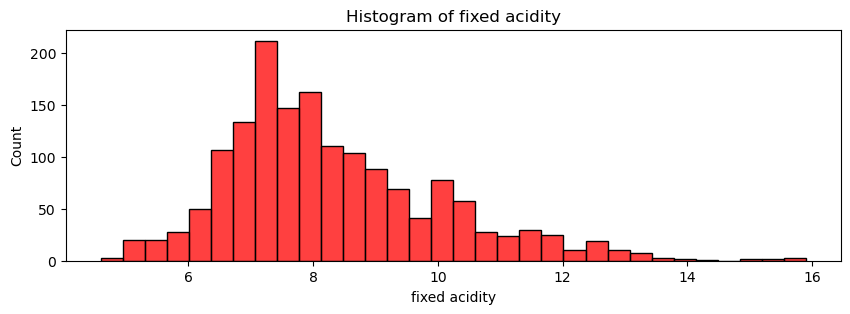

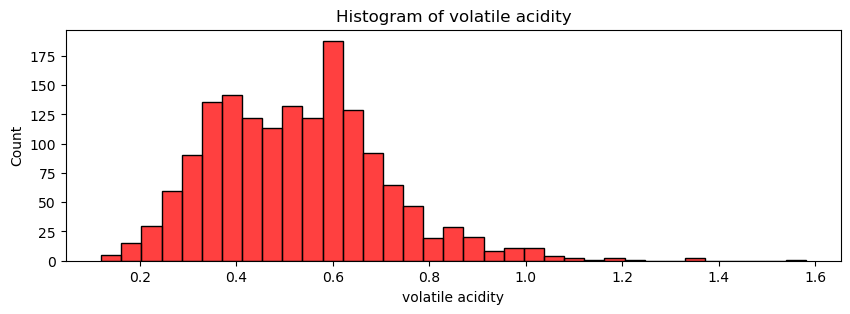

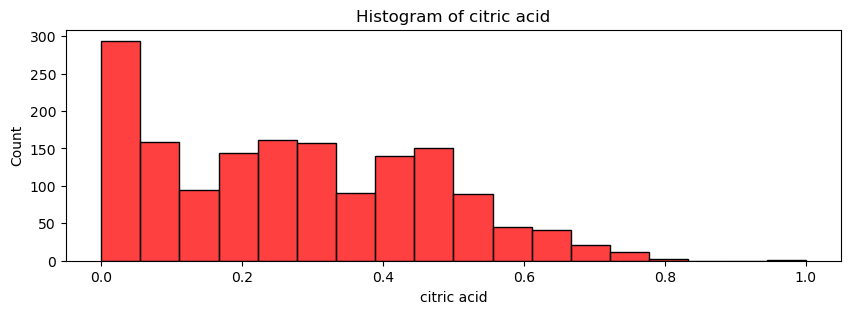

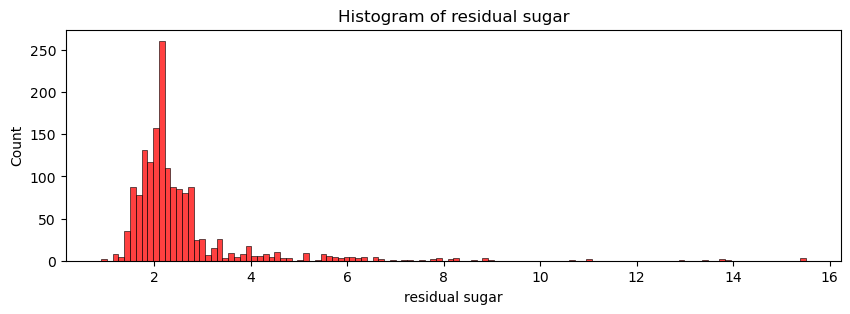

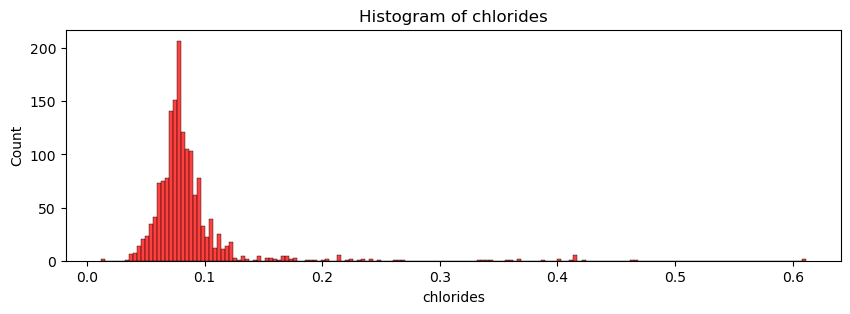

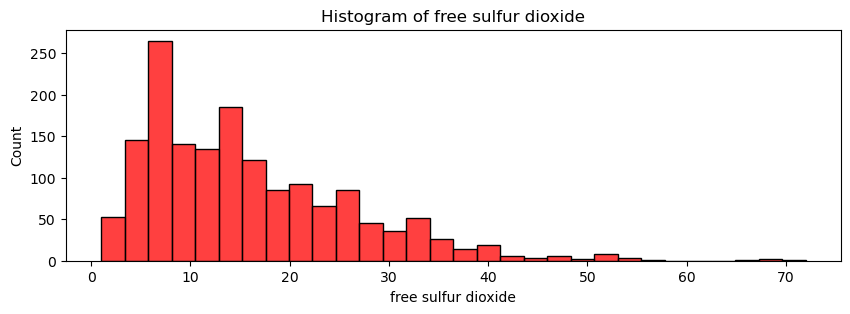

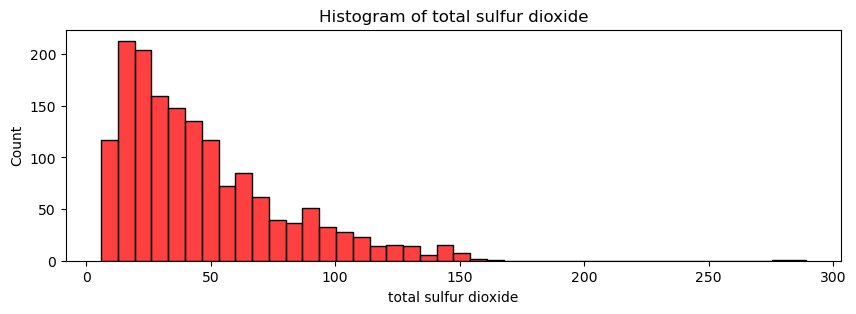

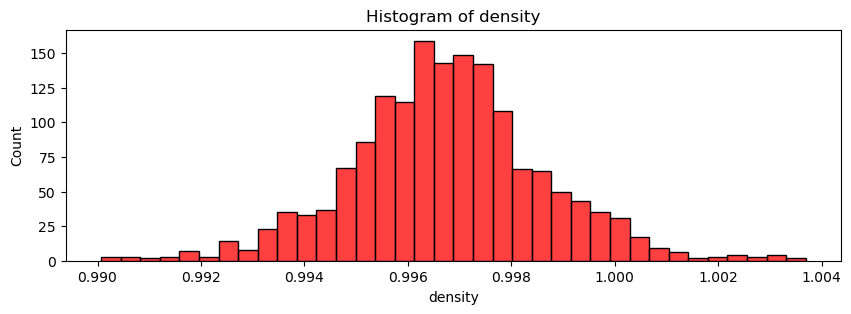

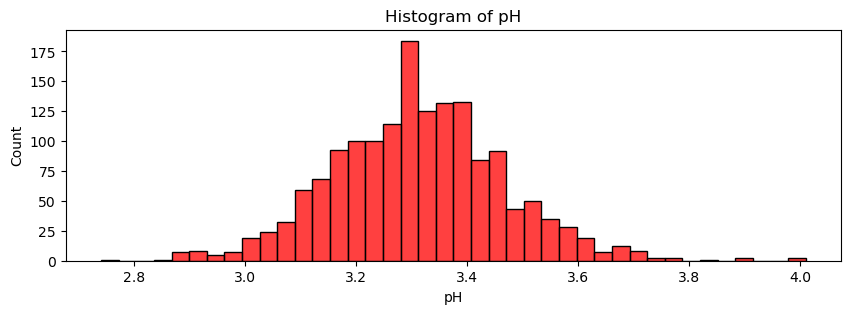

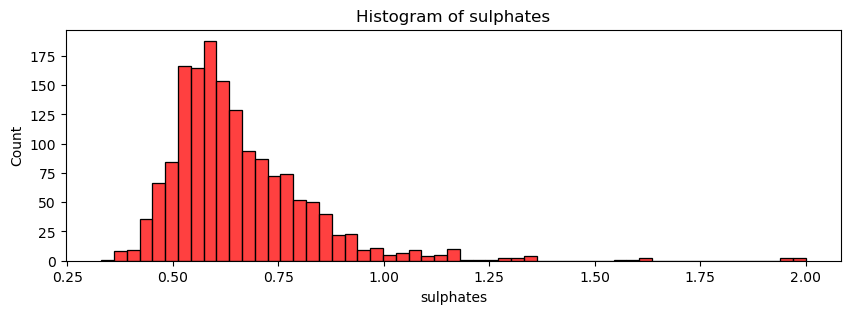

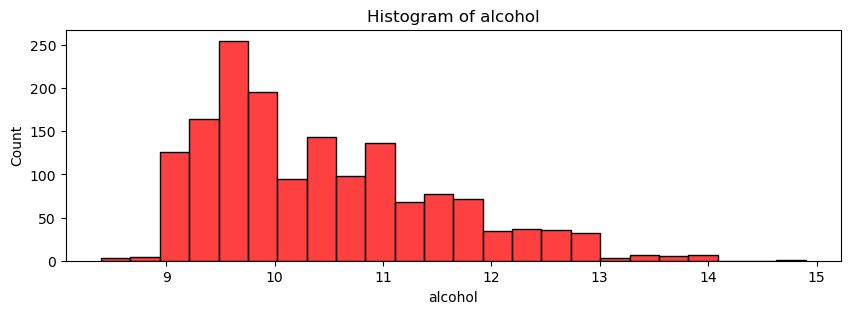

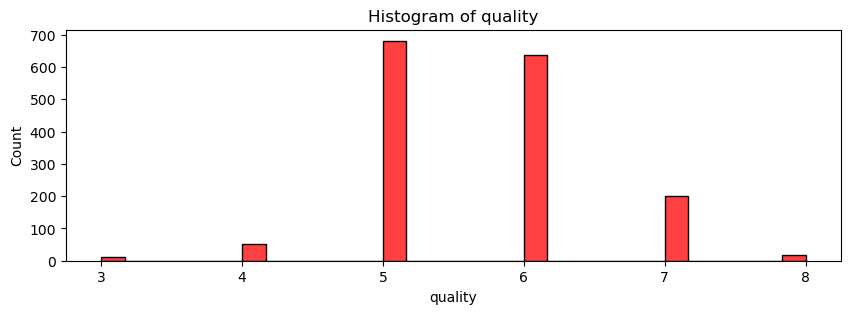

In [4]:
#Red Wine histograms
w.display_numeric_column_histograms(df_red)

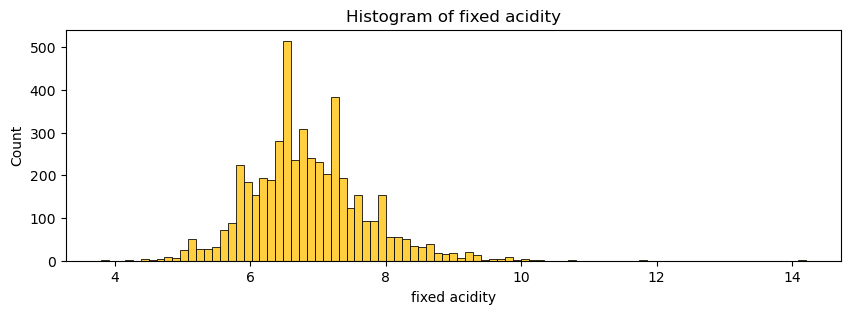

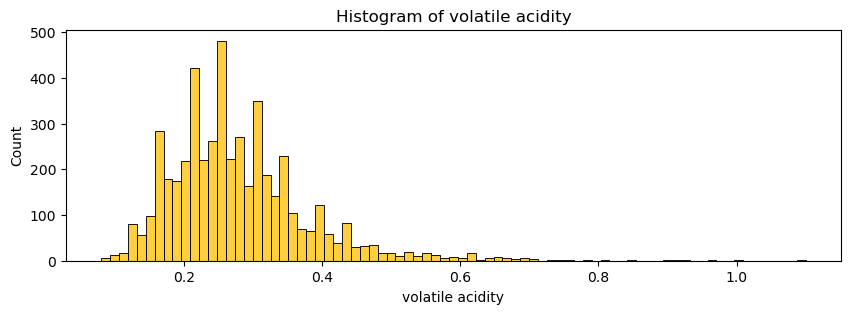

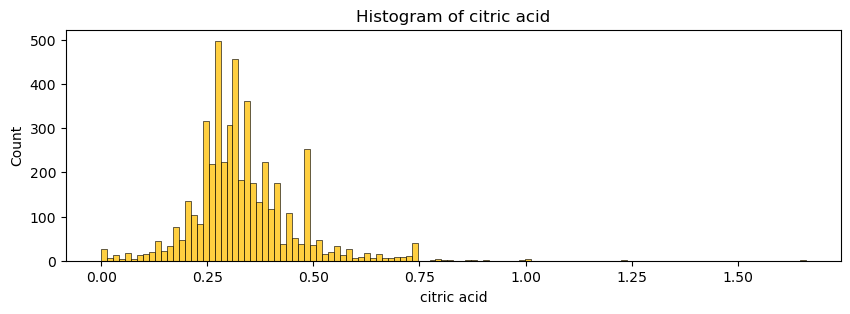

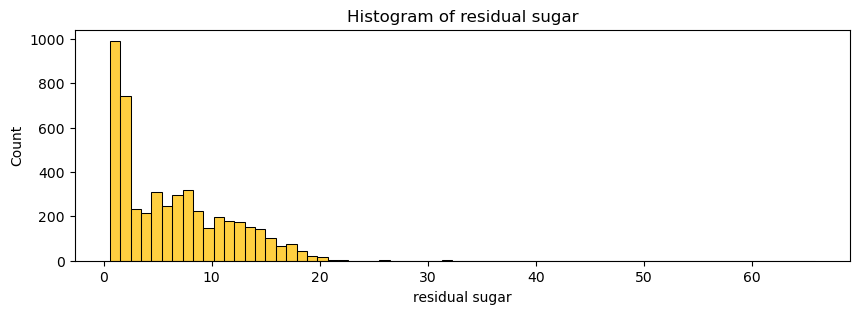

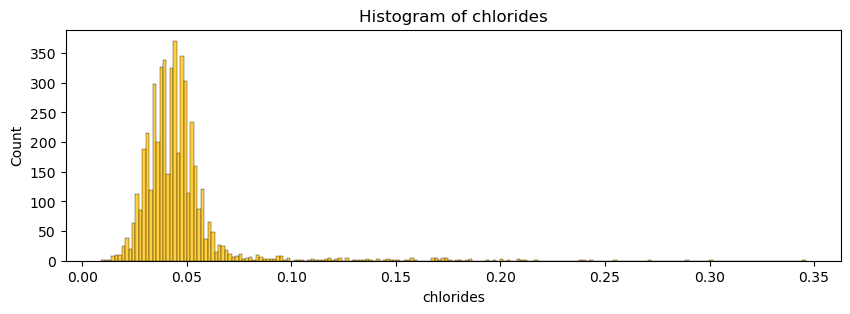

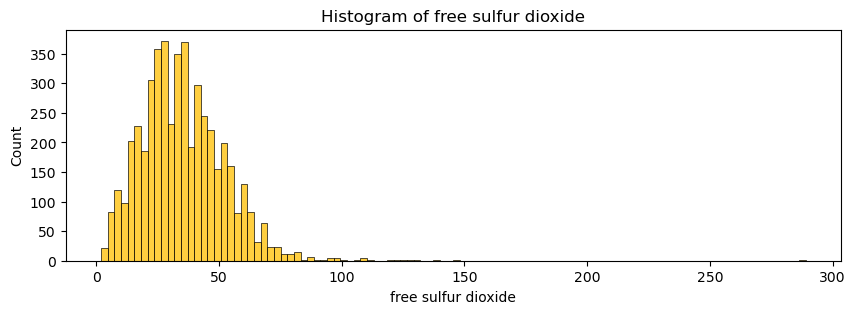

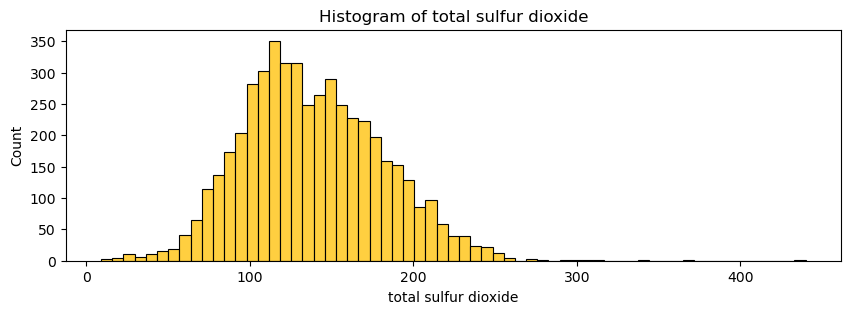

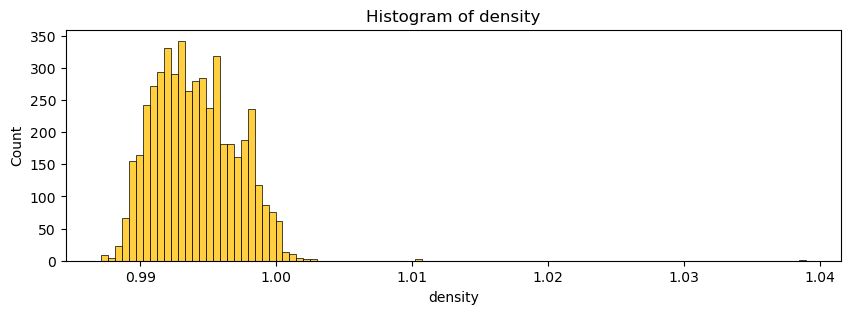

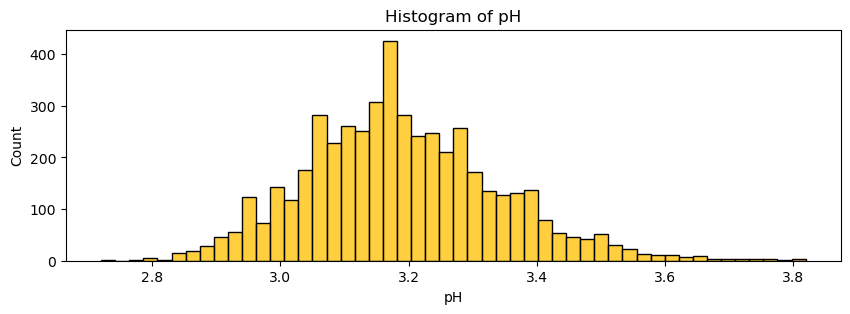

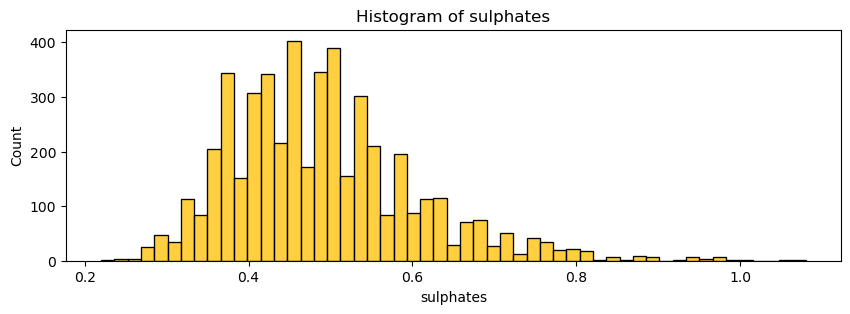

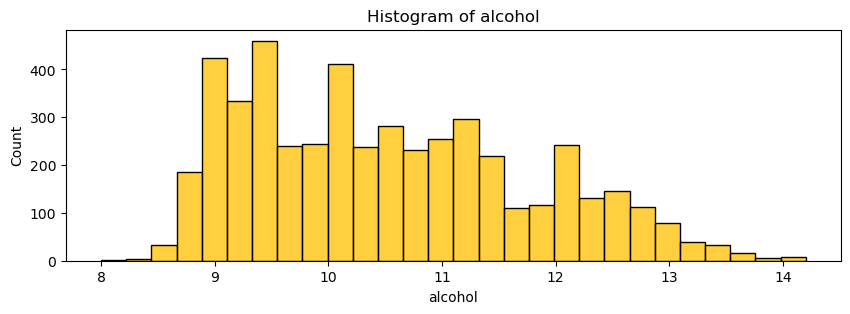

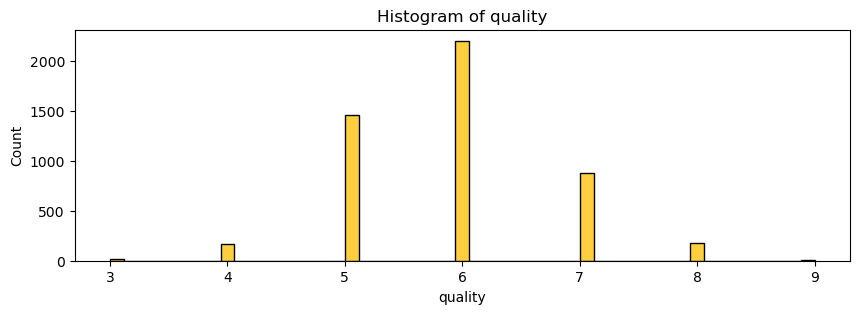

In [135]:
#White Wine histograms
w.display_numeric_column_histograms(df_white)

# Questions Explored:

<div style="background-color: olive; padding: 15px; font-size: 15px;">
 <div style="background: linear-gradient(to right, pink, lightgreen);">
Question 1: What are the major drivers of wine quality?
</div> 
 <div style="background: linear-gradient(to right, pink, lightgreen);">    
Question 2: Is higher alcohol content related to increased quality?
</div>
 <div style="background: linear-gradient(to right, pink, lightgreen);">    
Question 3: How do different types of wine (red and white) differ in quality drivers?
</div>
<div style="background: linear-gradient(to right, pink, lightgreen);">    
Question 4: Which machine learning model performs best for predicting wine quality?
</div>

# Stats Test:

In [136]:
# stats testing on volatile acidity
# Running a t test because there is one continuous and one categorical variable
alpha = .05
quality_vol = train[train.high_quality == 1]['volatile_acidity']
not_quality_vol = train[train.high_quality != 1]['volatile_acidity']
t_stat, p1 = stats.ttest_ind(quality_vol, not_quality_vol, equal_var=True)
t_stat, p1



(-16.86881930531246, 1.578417028366726e-61)

In [137]:
# Perform a hypothesis test:
if p1 < alpha:
    print('Reject the null hypothesis. Meaning, There is an association between volatile acidity and high quality. They are not independent.')
else:
    print('Fail to reject the null. Meaning, There is not an association between volatile acidity and high quality. They are independent.')


Reject the null hypothesis. Meaning, There is an association between volatile acidity and high quality. They are not independent.


In [138]:
# Testing on alcohol and quality
quality_alc = train[train.high_quality == 1]['alcohol']
not_quality_alc = train[train.high_quality != 1]['alcohol']
t_stat, p2 = stats.ttest_ind(quality_alc, not_quality_alc, equal_var=True)
t_stat, p2

(25.869044539331117, 1.3837833944265237e-135)

In [139]:
# Perform a hypothesis test:
if p2 < alpha:
    print('Reject the null hypothesis. Meaning, There is an association between alcohol and high quality. They are not independent.')
else:
    print('Fail to reject the null. Meaning, There is not an association between alcohol and high quality. They are independent.')


Reject the null hypothesis. Meaning, There is an association between alcohol and high quality. They are not independent.


In [140]:
# Testing on chlorides
quality_chl = train[train.high_quality == 1]['chlorides']
not_quality_chl = train[train.high_quality != 1]['chlorides']
t_stat, p3 = stats.ttest_ind(quality_chl, not_quality_chl, equal_var=True)
t_stat, p3

(-10.241716398665156, 2.7475337238622064e-24)

In [141]:
# Perform a hypothesis test:
if p3 < alpha:
    print('Reject the null hypothesis. Meaning, There is an association between chlorides and high quality. They are not independent.')
else:
    print('Fail to reject the null. Meaning, There is not an association between chlorides and high quality. They are independent.')


Reject the null hypothesis. Meaning, There is an association between chlorides and high quality. They are not independent.


In [142]:
#Testing on  density
quality_den = train[train.high_quality == 1]['density']
not_quality_den = train[train.high_quality != 1]['density']
t_stat, p4 = stats.ttest_ind(quality_den, not_quality_den, equal_var=True)
t_stat, p4


(-16.3496941032499, 4.9108735990570265e-58)

In [143]:
# Perform a hypothesis test:
if p4 < alpha:
    print('Reject the null hypothesis. Meaning, There is an association between density and high quality. They are not independent.')
else:
    print('Fail to reject the null. Meaning, There is not an association between density and high quality. They are independent.')


Reject the null hypothesis. Meaning, There is an association between density and high quality. They are not independent.


In [144]:
#Testing On free_so2
quality_free = train[train.high_quality == 1]['free_so2']
not_quality_free = train[train.high_quality != 1]['free_so2']
t_stat, p5 = stats.ttest_ind(quality_free, not_quality_free, equal_var=True)
t_stat, p5

(2.6667412125719983, 0.007692996214169554)

In [145]:
# Perform a hypothesis test:
if p5 < alpha:
    print('Reject the null hypothesis. Meaning, There is an association between free_so2 and high quality. They are not independent.')
else:
    print('Fail to reject the null. Meaning, There is not an association between free_so2 and high quality. They are independent.')


Reject the null hypothesis. Meaning, There is an association between free_so2 and high quality. They are not independent.


In [146]:
#Testing on total_so2
quality_tot = train[train.high_quality == 1]['total_so2']
not_quality_tot = train[train.high_quality != 1]['total_so2']
t_stat, p6 = stats.ttest_ind(quality_tot, not_quality_tot, equal_var=True)
t_stat, p6

(-3.206203140684193, 0.0013566456436942668)

In [147]:
# Perform a hypothesis test:
if p6 < alpha:
    print('Reject the null hypothesis. Meaning, There is an association between total_so2 and high quality. They are not independent.')
else:
    print('Fail to reject the null. Meaning, There is not an association between total_so2 and high quality. They are independent.')


Reject the null hypothesis. Meaning, There is an association between total_so2 and high quality. They are not independent.


In [148]:
# Sort the list of p-values in ascending order to identify their relative significance.
# The resulting 'new_list' will have p-values arranged from smallest to largest.

list_of_p = (p1,p2,p3,p4,p5,p6)
new_list = sorted(list_of_p)
print(new_list)

[1.3837833944265237e-135, 1.578417028366726e-61, 4.9108735990570265e-58, 2.7475337238622064e-24, 0.0013566456436942668, 0.007692996214169554]


### feature importance ranked
#### alcohol, volatile_acidity, density, chlorides, total_so2, free_so2 

### Volatile acidity,Alcohol,Chlorides,Density,Free_so2,Total_so2 are confirmed drivers of quality

<div style="background: linear-gradient(to right, pink, lightgreen);">
Question 1: What are the major drivers of wine quality?
</div>    

Approach: Analyze the correlation between various wine attributes and quality ratings.


# Hypothesis Testing

Null Hypothesis (H0): There are no specific major drivers that significantly influence wine quality.

Alternative Hypothesis (H1): There are specific major drivers that significantly influence wine quality.

 Insights: Alcohol content can be considered the most influential or significant attribute that influence wine quality. A very low p-value indicates strong evidence against the null hypothesis, suggesting that alcohol content likely has a significant impact on the outcome being tested in the analysis. 

<div style="background: linear-gradient(to right, pink, lightgreen);">
   
Question 2: Is higher alcohol content related to increased quality?
</div> 

Approach: Conduct a regression analysis to determine the impact of alcohol content on wine quality.


# Hypothesis Testing

Null Hypothesis (H0): There is no significant relationship between alcohol content and wine quality.
Alternative Hypothesis (H1): Higher alcohol content is significantly related to increased wine quality.

Insights: Wine with alcohol level over 10.7 is significantly more likely to be high quality.

<div style="background: linear-gradient(to right, pink, lightgreen);">
   
Question 3: How do different types of wine (red and white) differ in quality drivers?
</div> 

Approach: Compare the major attributes affecting quality in red and white wines.


Insights:  White wine has a higher alcohol, lower volatile acidity, and lower density, so it will have a higher quality more often than red wine

# Hypothesis Testing

Null Hypothesis (H0): Red and white wines do not differ significantly in quality drivers.
Alternative Hypothesis (H1): Red and white wines differ significantly in quality drivers.

<div style="background: linear-gradient(to right, pink, lightgreen);">
   
Question 4: Which machine learning model performs best for predicting wine quality?
</div> 

Approach: Evaluate multiple regression models, such as Linear Regression, KNN, and Polynomial Regression, for their predictive accuracy.

Insights: KNN (5 neighbors), with clusters perform best to determine wine quality prediction.

# Hypothesis Testing

Null Hypothesis (H0): There is no significant difference in predictive performance among different machine learning models for predicting wine quality.
Alternative Hypothesis (H1): There is a significant difference in predictive performance among different machine learning models for predicting wine quality.

# Scaling

In [149]:
# Scale the data using the scale_data function and return the scaler
scaler, train_scaled, validate_scaled, test_scaled = w.scale_data(train, validate, test, return_scaler=True)

In [150]:
train_scaled.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,ph,sulphates,alcohol,quality,is_red,high_quality
2112,0.222222,0.093333,0.150602,0.253067,0.068106,0.149306,0.304147,0.250434,0.440945,0.084270,0.133333,5,0,0
802,0.247863,0.206667,0.210843,0.168712,0.058140,0.194444,0.493088,0.205128,0.259843,0.174157,0.216667,5,0,0
3146,0.196581,0.100000,0.216867,0.254601,0.049834,0.125000,0.285714,0.238095,0.385827,0.117978,0.133333,6,0,1


#### Used MinMaxScaler for scaling

## Feature Selection

### 1.  SelectKBest

In [151]:
# Preparing data for a binary classification task to predict 'high_quality'

# Training data: Remove 'quality' and 'high_quality' columns and set 'high_quality' as the target
X_train_scaled = train_scaled.drop(columns=['quality', 'high_quality'])
y_train_scaled = train_scaled.high_quality

# Validation data: Remove 'quality' and 'high_quality' columns and set 'high_quality' as the target
X_val_scaled = validate_scaled.drop(columns=['quality', 'high_quality'])
y_val_scaled = validate_scaled.high_quality

# Test data: Remove 'quality' and 'high_quality' columns and set 'high_quality' as the target
X_test_scaled = test_scaled.drop(columns=['quality', 'high_quality'])
y_test_scaled = test_scaled.high_quality

In [152]:
# Create a SelectKBest model with the 'f_regression' scoring function and select the top 4 features
kbest = SelectKBest(score_func=f_regression, k=4)

# Fit the SelectKBest model to the training data to identify the top 4 features
kbest.fit(X_train_scaled, y_train_scaled)

# Create a feature mask that identifies the selected features (True for selected, False for not selected)
feature_mask = kbest.get_support()

# Retrieve the column names of the top 4 selected features from the training data
X_train_scaled.columns[feature_mask]

Index(['volatile_acidity', 'chlorides', 'density', 'alcohol'], dtype='object')

### 2. RFE

In [48]:
# Create the algorithm
lm = LinearRegression()
# Assign the number of feature
rfe = RFE(estimator=lm, n_features_to_select=4)
# Now we are fitting those features to our train set
X_rfe = rfe.fit(X_train_scaled, y_train_scaled)
# Create a variable that takes X_train and turns rfe features into a list
rfe_columns = X_train_scaled.columns[rfe.support_].tolist()
# Call the variable
rfe_columns

['volatile_acidity', 'free_so2', 'total_so2', 'alcohol']

#### volatile_acidity is our number 1 driver according to both selectkbest and rfe, and alcohol is a driver in both. 

Important Features are:'volatile_acidity', 'chlorides', 'density', 'alcohol','total_so2', 'free_so2'

<Axes: xlabel='alcohol', ylabel='volatile_acidity'>

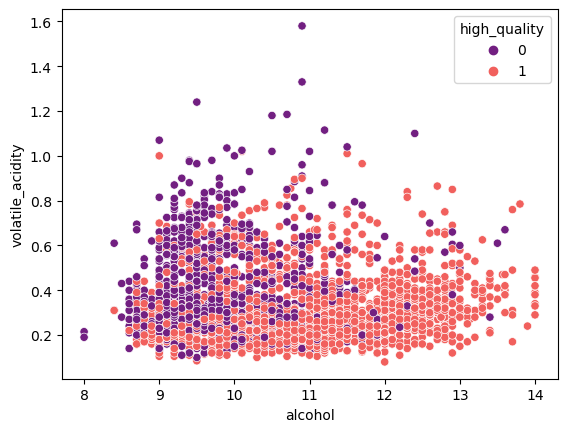

In [69]:
# Create a scatterplot to visualize the relationship
sns.scatterplot(x='alcohol', y='volatile_acidity', hue='high_quality', palette='magma', data=train)

In [70]:
# Perform K-means clustering on a subset of the training data
X = train[['alcohol', 'volatile_acidity']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

clusters = kmeans.predict(X)

In [71]:
train['cluster'] = clusters

<Axes: xlabel='alcohol', ylabel='volatile_acidity'>

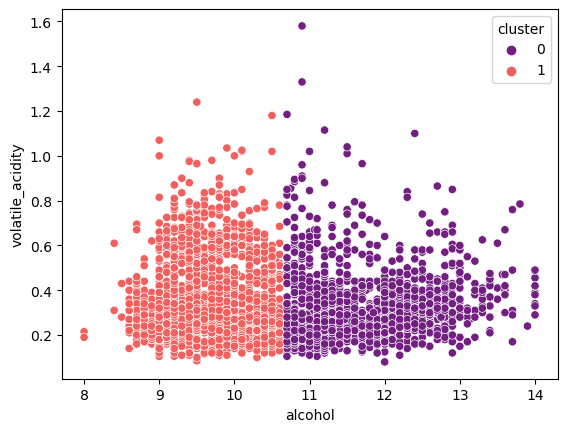

In [72]:
# Create a scatterplot to visualize the relationship
sns.scatterplot(x='alcohol', y='volatile_acidity', hue='cluster', data=train, palette='magma')


<Axes: xlabel='alcohol', ylabel='density'>

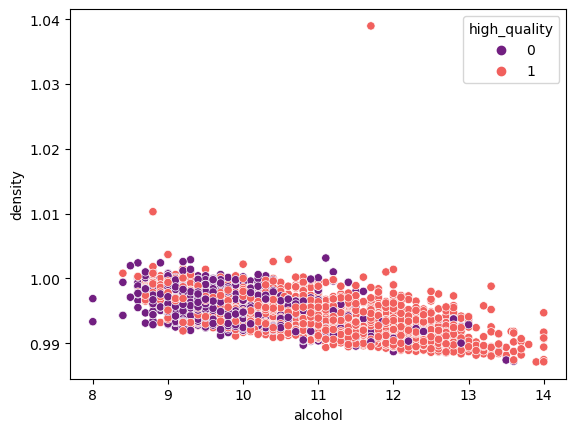

In [73]:
# Create a scatterplot to visualize the relationship
sns.scatterplot(x='alcohol', y='density', hue='high_quality', palette='magma', data=train)

<Axes: xlabel='alcohol', ylabel='density'>

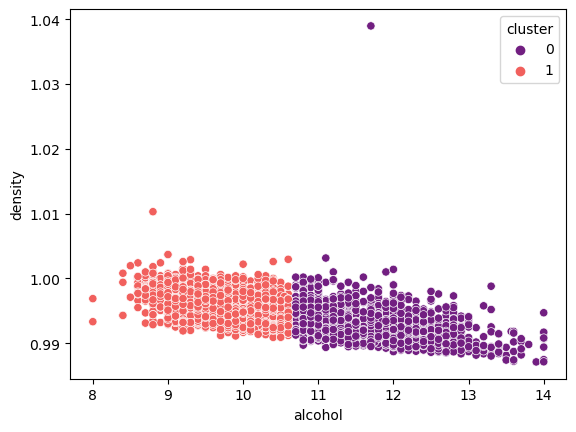

In [74]:
# Perform K-means clustering on a subset of the training data
X = train[['alcohol', 'density']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

clusters = kmeans.predict(X)
train['cluster'] = clusters
sns.scatterplot(x='alcohol', y='density', hue='cluster', data=train, palette='magma')


<Axes: xlabel='alcohol', ylabel='chlorides'>

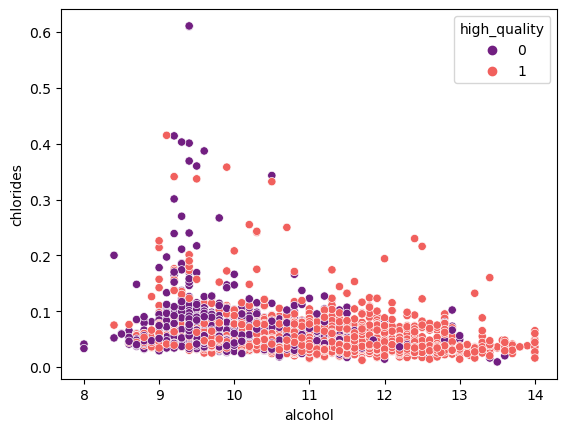

In [75]:
# Create a scatterplot to visualize the relationship
sns.scatterplot(x='alcohol', y='chlorides', hue='high_quality', data=train, palette='magma')

<Axes: xlabel='alcohol', ylabel='chlorides'>

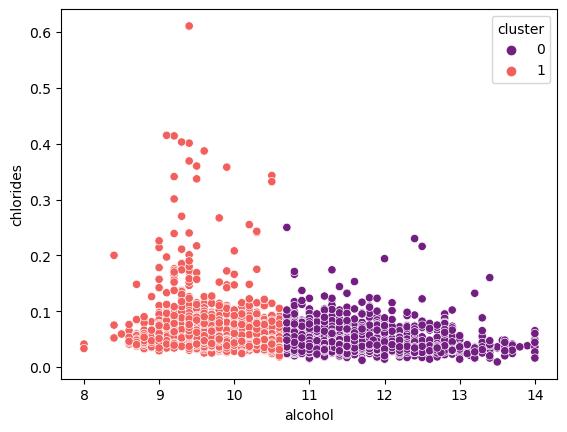

In [78]:
# Perform K-means clustering on a subset of the training data
X = train[['alcohol', 'chlorides']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

clusters = kmeans.predict(X)
train['cluster'] = clusters
sns.scatterplot(x='alcohol', y='chlorides', hue='cluster', data=train, palette='magma')

### Takeaway: Wine with alcohol level over 10.7 is significantly more likely to be high quality

<Axes: xlabel='total_so2', ylabel='free_so2'>

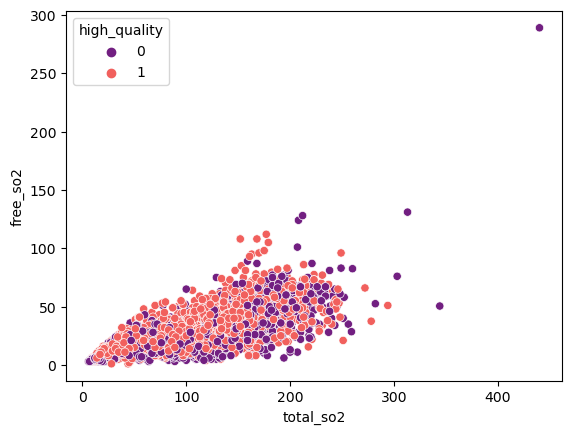

In [79]:
# Create a scatterplot to visualize the relationship
sns.scatterplot(x='total_so2', y='free_so2', hue='high_quality', data=train, palette='magma')

<Axes: xlabel='total_so2', ylabel='free_so2'>

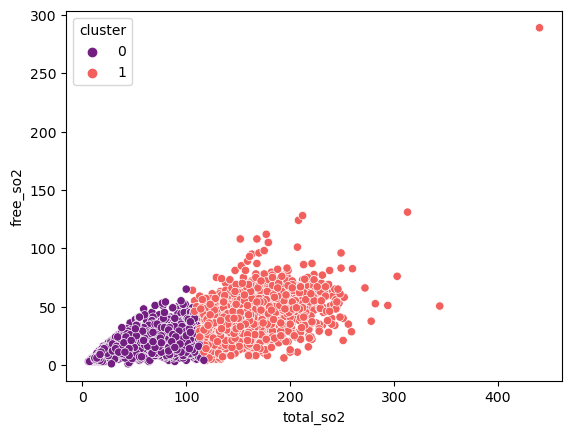

In [81]:
# Perform K-means clustering on a subset of the training data
X = train[['total_so2', 'free_so2']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

clusters = kmeans.predict(X)
train['cluster'] = clusters
sns.scatterplot(x='total_so2', y='free_so2', hue='cluster', data=train, palette='magma')

### Takeaway: no concrete findings for free and total sulfur dioxide related to quality

<Axes: xlabel='fixed_acidity', ylabel='volatile_acidity'>

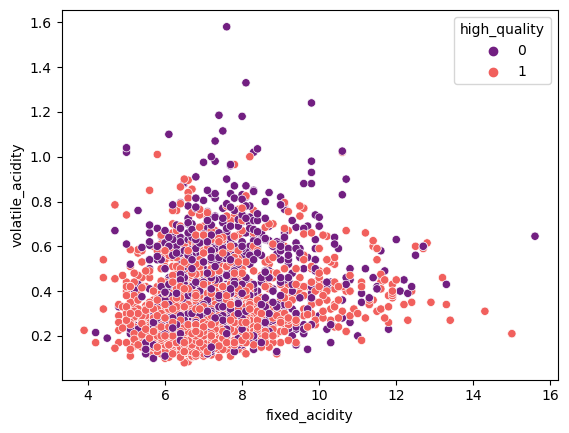

In [83]:
## Create a scatterplot to visualize the relationship
sns.scatterplot(x='fixed_acidity', y='volatile_acidity', hue='high_quality', data=train, palette='magma')

<Axes: xlabel='fixed_acidity', ylabel='volatile_acidity'>

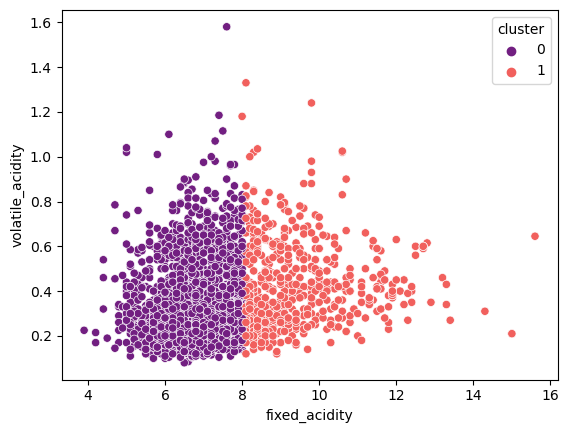

In [85]:
## Perform K-means clustering on a subset of the training data
X = train[['fixed_acidity', 'volatile_acidity']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

clusters = kmeans.predict(X)
train['cluster'] = clusters
sns.scatterplot(x='fixed_acidity', y='volatile_acidity', hue='cluster', data=train, palette='magma')

### Takeaway: no concrete findings for volatile and fixed acidity related to quality

<Axes: xlabel='is_red', ylabel='high_quality'>

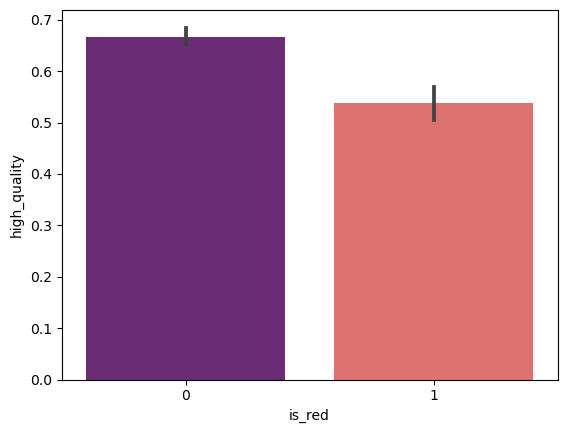

In [87]:
## Create a scatterplot to visualize the relationship
sns.barplot(x='is_red', y='high_quality', data=train, palette='magma')

### Takeaway: white wine is high quality more often than red wine

<Axes: xlabel='alcohol', ylabel='alcohol'>

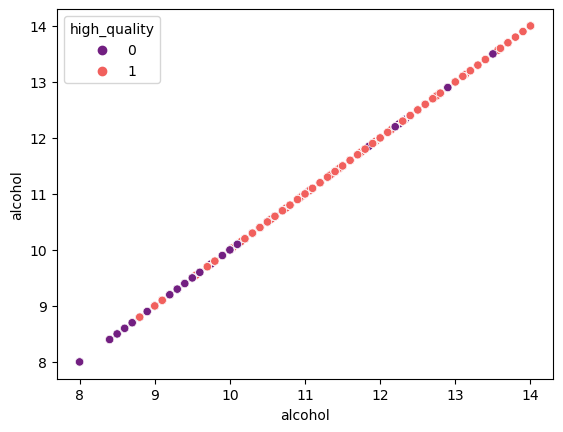

In [88]:
## Create a scatterplot to visualize the relationship
sns.scatterplot(x='alcohol', y='alcohol', hue='high_quality', data=train, palette='magma')

<Axes: xlabel='is_red', ylabel='volatile_acidity'>

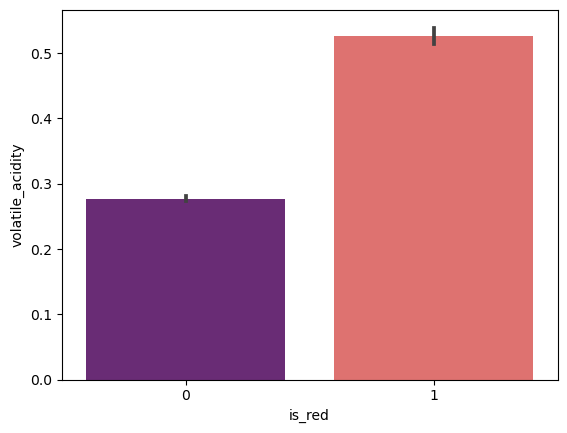

In [92]:
## Create a bar plot to visualize the relationship
sns.barplot(x='is_red', y='volatile_acidity', data=train, palette='magma')

<Axes: xlabel='is_red', ylabel='density'>

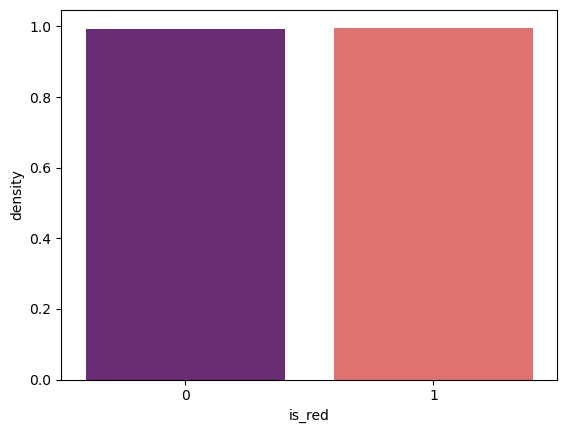

In [90]:
## Create a bar plot to visualize the relationship
sns.barplot(x='is_red', y='density', data=train, palette='magma')

<Axes: xlabel='alcohol', ylabel='density'>

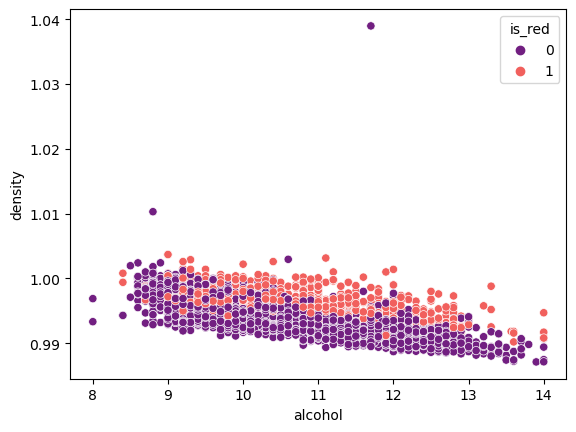

In [93]:
## Create a scatterplot to visualize the relationship
sns.scatterplot(x='alcohol', y='density', hue='is_red', palette= 'magma', data=train)

### White wine has a higher alcohol, lower volatile acidity, and lower density, so it will have a higher quality more often than red wine

In [95]:
train.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,ph,sulphates,alcohol,quality,is_red,high_quality,cluster
2112,6.5,0.22,0.25,17.1,0.050,44.0,138.0,1.00010,3.30,0.37,8.8,5,0,0,0
802,6.8,0.39,0.35,11.6,0.044,57.0,220.0,0.99775,3.07,0.53,9.3,5,0,0,0
3146,6.2,0.23,0.36,17.2,0.039,37.0,130.0,0.99946,3.23,0.43,8.8,6,0,1,0


### Higher alcohol, lower volatile acidity, and lower density lead to higher quality

<div style="background-color: olive; padding: 20px; font-size: 20px;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan --- Acquire ---Prepare--- Explore --- <strong style="font-size: 18px; background-color: orange;">MODEL</strong> --- Deliver
    </div>
</div>


In [96]:
# Prepare data for a binary classification task to predict 'high_quality'.

X_train = train.drop(columns=['quality', 'high_quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_so2', 'total_so2', 'ph', 'sulphates', 'is_red'])
y_train = train.high_quality

X_validate = validate.drop(columns=['quality', 'high_quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_so2', 'total_so2', 'ph', 'sulphates', 'is_red'])
y_validate = validate.high_quality

X_test = test.drop(columns=['quality', 'high_quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_so2', 'total_so2', 'ph', 'sulphates', 'is_red'])
y_test = test.high_quality

In [97]:
X_train.head()

,volatile_acidity,chlorides,density,alcohol,cluster
2112,0.22,0.050,1.00010,8.8,0
802,0.39,0.044,0.99775,9.3,0
3146,0.23,0.039,0.99946,8.8,0
388,0.46,0.088,0.99810,9.2,0
1884,0.22,0.029,0.99480,10.2,0


# Baseline_accuracy 

In [98]:
# Finding the baseline quality
baseline = train.quality.mean()
baseline

5.827880120978829

### KNN-neighbour parameter 5

In [99]:
# Create a K-Nearest Neighbors (KNN) classifier with 5 neighbors and uniform weighting.
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1323
           1       0.83      0.87      0.85      2314

    accuracy                           0.81      3637
   macro avg       0.80      0.79      0.79      3637
weighted avg       0.81      0.81      0.81      3637



# Summary:-

## KNN - accuracy 81% 

# Logistic Regression

In [103]:
# Create a Logistic Regression classifier with regularization strength C=1 and a fixed random state.
logit = LogisticRegression(C=1, random_state=123)
logit.fit(X_test, y_test)
y_pred = logit.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       513
           1       0.76      0.78      0.77       787

    accuracy                           0.72      1300
   macro avg       0.71      0.71      0.71      1300
weighted avg       0.72      0.72      0.72      1300



# Summary:-

# Logistic Regression - accuracy 73%

In [104]:
# Prepare data for a regression task to predict 'quality'.
X_train_scaled = train_scaled.drop(columns=['quality', 'high_quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_so2', 'total_so2', 'ph', 'sulphates', 'is_red'])
y_train_scaled = train_scaled.quality

X_val_scaled = validate_scaled.drop(columns=['quality', 'high_quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_so2', 'total_so2', 'ph', 'sulphates', 'is_red'])
y_val_scaled = validate_scaled.quality

X_test_scaled = test_scaled.drop(columns=['quality', 'high_quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_so2', 'total_so2', 'ph', 'sulphates', 'is_red'])
y_test_scaled = test_scaled.quality

In [105]:
#Function for evaluating regression models
def metrics_reg(y, yhat):
    """
    send in y_true, y_pred & returns RMSE, R2
    """
    rmse = mean_squared_error(y, yhat, squared=False)
    r2 = r2_score(y, yhat)
    return rmse, r2

In [106]:
# Polynomial Regression:
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_val_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

#make it
pr = LinearRegression()

#fit it
pr.fit(X_train_degree2, y_train_scaled)

#use it
pred_pr = pr.predict(X_train_degree2)
pred_val_pr = pr.predict(X_validate_degree2)

In [107]:
# Evaluate the performance of the polynomial regression model on the training data.
metrics_reg(y_train_scaled, pred_pr)

(0.7462752683127339, 0.275104037913692)

In [108]:
# Calculate RMSE and R-squared (R2) score on validate
rmse, r2 = metrics_reg(y_val_scaled, pred_val_pr)
rmse, r2

(0.7466708531195779, 0.26041035011831715)

# Summary:-

### Polynomial regression - .74 above on average, accurate 27% of the time

## KNN 
### change in n_neighbor parameter to 10

In [109]:
# Create a K-Nearest Neighbors (KNN) classifier with 10 neighbors and uniform weighting.

knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68      1323
           1       0.81      0.82      0.82      2314

    accuracy                           0.77      3637
   macro avg       0.75      0.75      0.75      3637
weighted avg       0.77      0.77      0.77      3637



# Summary:-

### KNN - accuracy 77%


## KNN 5 neighbors 

In [112]:
# Create a K-Nearest Neighbors (KNN) classifier with 5 neighbors and uniform weighting on validation dataset
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_validate, y_validate)
y_pred = knn.predict(X_validate)
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       548
           1       0.83      0.89      0.86      1012

    accuracy                           0.81      1560
   macro avg       0.80      0.78      0.79      1560
weighted avg       0.81      0.81      0.81      1560



In [113]:
# Create a K-Nearest Neighbors (KNN) classifier with 5 neighbors and uniform weighting on test dataset
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_test, y_test)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       513
           1       0.83      0.85      0.84       787

    accuracy                           0.81      1300
   macro avg       0.80      0.79      0.80      1300
weighted avg       0.80      0.81      0.80      1300



# Summary:-

### KNN 5 neighbors is 81% on validate and test as well 

In [116]:
# Prepare data for a binary classification task to predict 'high_quality'.

X_train = train.drop(columns=['quality', 'high_quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_so2', 'total_so2', 'ph', 'sulphates', 'is_red'])
y_train = train.high_quality

X_validate = validate.drop(columns=['quality', 'high_quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_so2', 'total_so2', 'ph', 'sulphates', 'is_red'])
y_validate = validate.high_quality

X_test = test.drop(columns=['quality', 'high_quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_so2', 'total_so2', 'ph', 'sulphates', 'is_red'])
y_test = test.high_quality

In [117]:
X = train[['alcohol', 'volatile_acidity']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

clusters = kmeans.predict(X)
train['cluster'] = clusters

In [118]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(train, y_train)
y_pred = knn.predict(train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1323
           1       0.86      0.91      0.88      2314

    accuracy                           0.85      3637
   macro avg       0.84      0.82      0.83      3637
weighted avg       0.85      0.85      0.84      3637



### We found that accuracy in our best model went up by 4% with clustered data, and adding more clusters lowered accuracy. 

In [122]:
# Prepare data for a binary classification task to predict 'high_quality'.

X_train = train.drop(columns=['quality', 'high_quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_so2', 'total_so2', 'ph', 'sulphates', 'is_red'])
y_train = train.high_quality

X_validate = validate.drop(columns=['quality', 'high_quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_so2', 'total_so2', 'ph', 'sulphates', 'is_red'])
y_validate = validate.high_quality

X_test = test.drop(columns=['quality', 'high_quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_so2', 'total_so2', 'ph', 'sulphates', 'is_red'])
y_test = test.high_quality

X = validate[['alcohol', 'volatile_acidity']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

clusters = kmeans.predict(X)
validate['cluster'] = clusters

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(validate, y_validate)
y_pred = knn.predict(validate)
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.64      0.72       548
           1       0.82      0.93      0.87      1012

    accuracy                           0.83      1560
   macro avg       0.83      0.78      0.80      1560
weighted avg       0.83      0.83      0.82      1560



In [124]:
# Prepare data for a binary classification task to predict 'high_quality'.

X_train = train.drop(columns=['quality', 'high_quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_so2', 'total_so2', 'ph', 'sulphates', 'is_red'])
y_train = train.high_quality

X_validate = validate.drop(columns=['quality', 'high_quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_so2', 'total_so2', 'ph', 'sulphates', 'is_red'])
y_validate = validate.high_quality

X_test = test.drop(columns=['quality', 'high_quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_so2', 'total_so2', 'ph', 'sulphates', 'is_red'])
y_test = test.high_quality

X = test[['alcohol', 'volatile_acidity']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
test['cluster'] = clusters

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(test, y_test)
y_pred = knn.predict(test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       513
           1       0.82      0.86      0.84       787

    accuracy                           0.80      1300
   macro avg       0.80      0.79      0.79      1300
weighted avg       0.80      0.80      0.80      1300



### We got 81% accuracy with 3 clusters on our test split with our KNN model with 5 neighbors and uniform weight

## Decision Tree

In [126]:
# Create a binary classification label 'label' based on the 'high_quality' column.

train['label'] = train.high_quality == 1
X_train = train.drop(columns=['quality', 'high_quality', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_so2', 'total_so2', 'ph', 'sulphates', 'is_red', 'label'])
clf = DT(max_depth=2)

y_train = train[['label']]
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [127]:
# predict off of the dataset and look at the performance of the model
model_1_preds = clf.predict(X_train)
print(classification_report(y_train, model_1_preds))

              precision    recall  f1-score   support

       False       0.68      0.50      0.58      1323
        True       0.75      0.87      0.81      2314

    accuracy                           0.73      3637
   macro avg       0.72      0.68      0.69      3637
weighted avg       0.73      0.73      0.72      3637



### We got 73% accuracy with max_depth of 2  on our decision tree model

<div style="background-color: olive; padding: 20px; font-size: 20px;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan --- Acquire ---Prepare--- Explore --- Model ---<strong style="font-size: 18px; background-color: orange;">DELIVER</strong>
    </div>
</div>


<div style="background: linear-gradient(to right, pink, lightgreen);">
<strong style="font-size: 18px; background-color: orange;">Best model to deliver :KNN 5 neighbors model </strong>    

</div>

In [ ]:
KNN 5 neighbors is 81% on validate and test datasets